# Imports

In [56]:
import numpy as np
from Fit import Fit
from funcs import *
from stats import *
import scienceplots
plt.style.use(['grid'])

# Funcs

In [57]:
def G_R(w, R, R_L, L, C):
    return R / np.sqrt( (R+R_L)**2 + np.power(w*L - 1/(w*C), 2) )

def fase_R(w, R, R_L, L, C):
    return -np.arctan( (w*L - 1/(w*C)) / (R+R_L) )

def G(w, R, R_L, L, C):
    num = np.sqrt( np.power( R*R_L + R_L**2 + np.power(w*L - 1/(w*C), 2) , 2) + R*R*(w*L - 1/(w*C)))
    return num / (np.power(R+R_L, 2) + np.power(w*L - 1 /(w*C), 2))

# RLC

In [58]:
if 1:
    path_folder = 'data.leo/RLC_R/'
    V_res, V_l, fase_res, fase_l, freqs, V_res_err, V_l_err = [], [], [], [], [], [], []

    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH, V_SGN_err, V_MTH_err = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_l.append(V_MTH)
        V_res_err.append(V_SGN_err)
        V_l_err.append(V_MTH_err)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_l.append(dt_MTH*i*2*np.pi)
        freqs.append(i)

    V_res = np.array(V_res)
    V_l = np.array(V_l)
    V_res_err = np.array(V_res_err)
    V_l_err = np.array(V_l_err)
    fase_res = -np.array(fase_res) + np.pi
    fase_l = -(np.array(fase_l) - np.pi)
    freqs = np.array(freqs)

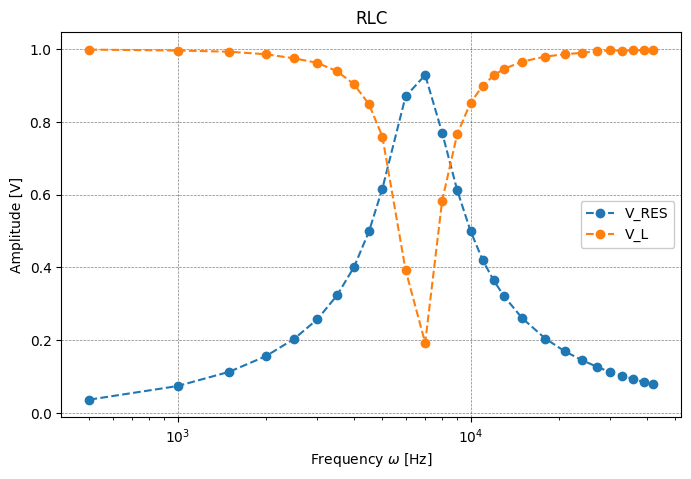

In [59]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_l, 'o--', label='V_L')
plt.title('RLC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


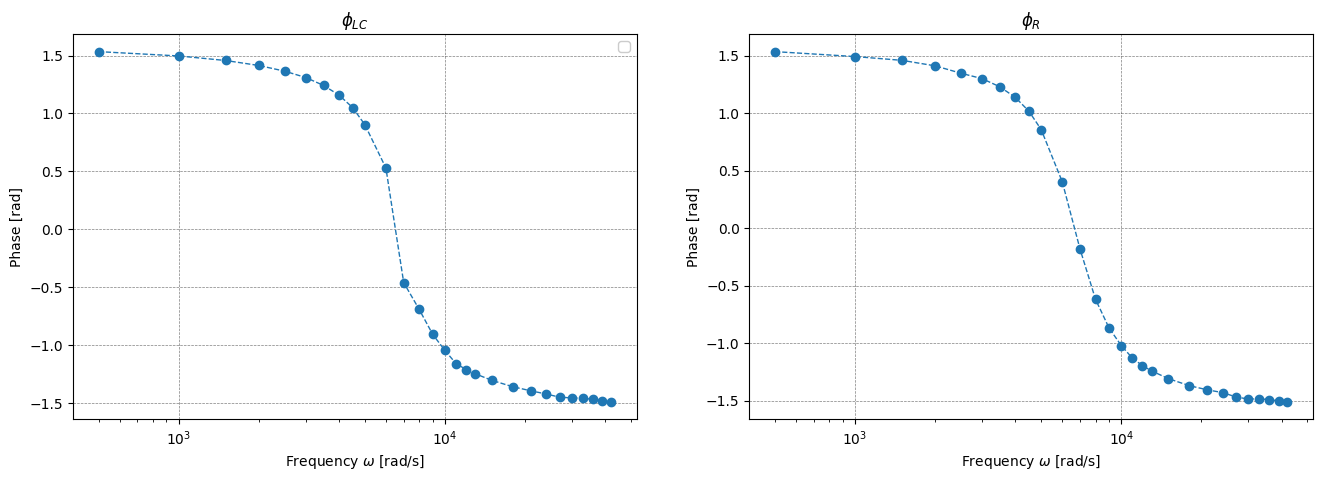

In [60]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

fase_res_mod = np.array(fase_res)
d = fase_res_mod < 0
u = fase_res_mod > 0
fase_res_mod[d] += 2*np.pi
fase_res_mod -= np.pi

d = fase_l < 0
u = fase_l > 0
fase_l_mod = np.array(fase_l)
fase_l_mod[d] = fase_l_mod[d] + np.pi/2
fase_l_mod[u] = fase_l_mod[u] - np.pi/2

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[:], fase_l_mod[:],'o--', lw=1)
plt.title('$\phi_{LC}$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[:], fase_res_mod[:], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

# R

In [61]:
c = LeastSquares(freqs*2*np.pi, V_res, V_res_err, G_R, verbose=False)
f_m = Minuit(c, R=997, R_L=39.9, L=40e-3, C=12e-9)
f_m.fixed['R','R_L'] = True
f_m.migrad()
f_m.hesse()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.425e+06 (χ²/ndof = 247131.8)│              Nfcn = 62               │
│ EDM = 3.42e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    997    │    10     │            │            │         │         │  yes  │
│ 1 │ R_L  │   39.9    │    0.4    │            │            │         │         │  yes  │
│ 2 │ L    │49.39782e-3│0.00033e-3 │            │            │         │         │       │
│ 3 │ C    │11.41715e-9│0.00008e-9 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │              R            R_L              L              C │
├─────┼─────────────────────────────────────────────────────────────┤
│   R │              0              0              0          0e-27 │
│ R_L │              0              0              0          0e-27 │
│   L │              0              0       1.11e-13 -20.910407e-21 │
│   C │          0e-27          0e-27 -20.910407e-21       6.94e-27 │
└─────┴─────────────────────────────────────────────────────────────┘

In [62]:
c = LeastSquares(freqs*2*np.pi, fase_res_mod, 0.01*np.ones_like(fase_res_mod), fase_R, verbose=False)
f_f = Minuit(c, R=997, R_L=39.9, L=40e-3, C=12e-9)
f_f.fixed['R','R_L'] = True
f_f.migrad()
f_f.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 44.32 (χ²/ndof = 1.7)      │              Nfcn = 58               │
│ EDM = 9.89e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    997    │    10     │            │            │         │         │  yes  │
│ 1 │ R_L  │   39.9    │    0.4    │            │            │         │         │  yes  │
│ 2 │ L    │ 49.73e-3  │  0.33e-3  │            │            │         │         │       │
│ 3 │ C    │ 11.43e-9  │  0.08e-9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │              R            R_L              L              C │
├─────┼─────────────────────────────────────────────────────────────┤
│   R │              0              0              0          0e-21 │
│ R_L │              0              0              0          0e-21 │
│   L │              0              0        1.1e-07 -23.883760e-15 │
│   C │          0e-21          0e-21 -23.883760e-15       6.33e-21 │
└─────┴─────────────────────────────────────────────────────────────┘

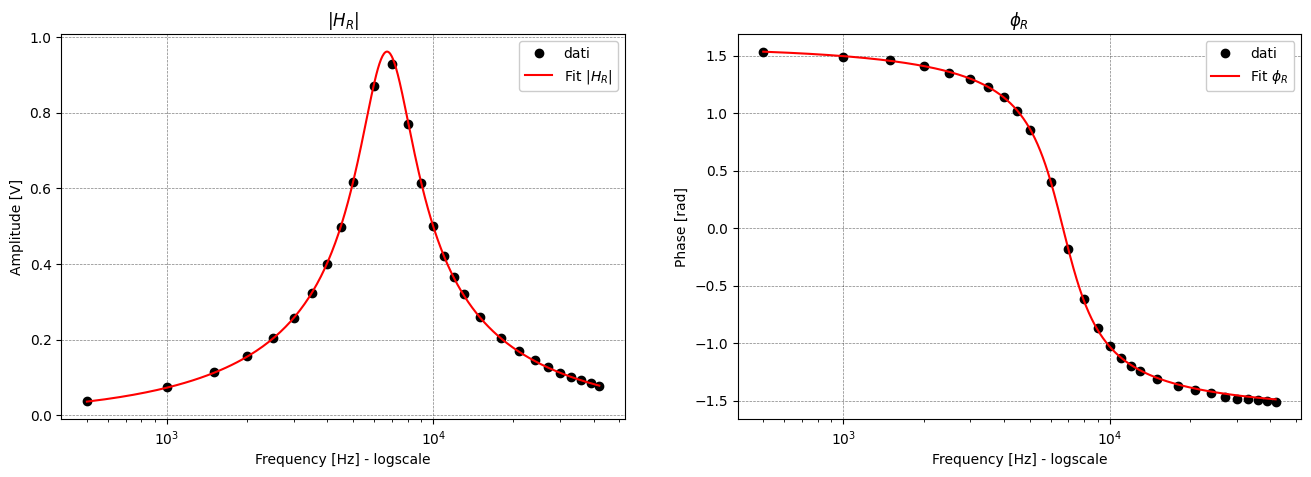

In [63]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, V_res, 'o', label='dati', c='k')
plt.plot(x, G_R(x*2*np.pi, **f_m.values.to_dict()), label='Fit $|H_R|$', c='r')
plt.title('$|H_R|$')
plt.legend()
plt.xlabel('Frequency [Hz] - logscale')
plt.ylabel('Amplitude [V]')
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs, fase_res_mod, 'o', label='dati', c='k')
plt.plot(x, fase_R(x*2*np.pi, **f_f.values.to_dict()), label='Fit $\phi_R$', c='r')
plt.title('$\phi_R$')
plt.legend()
plt.xlabel('Frequency [Hz] - logscale')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# LC

In [64]:
c = LeastSquares(freqs*2*np.pi, V_l, V_l_err, G, verbose=False)
f_m = Minuit(c, R=997, R_L=39.9, L=40e-3, C=12e-9)
f_m.fixed['R','R_L'] = True
f_m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.867e+08 (χ²/ndof = 7179829.4)│              Nfcn = 78               │
│ EDM = 1.36e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    997    │    10     │            │            │         │         │  yes  │
│ 1 │ R_L  │   39.9    │    0.4    │            │            │         │         │  yes  │
│ 2 │ L    │79.2726e-3 │ 0.0008e-3 │            │            │         │         │       │
│ 3 │ C    │7.19506e-9 │0.00008e-9 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │              R            R_L              L              C │
├─────┼─────────────────────────────────────────────────────────────┤
│   R │              0              0              0          0e-27 │
│ R_L │              0              0              0          0e-27 │
│   L │              0              0       7.11e-13 -61.228292e-21 │
│   C │          0e-27          0e-27 -61.228292e-21       5.66e-27 │
└─────┴─────────────────────────────────────────────────────────────┘

In [67]:
c = LeastSquares(freqs*2*np.pi, fase_l_mod, 0.01*np.ones_like(fase_l), fase_R, verbose=False)
f_f = Minuit(c, R=997, R_L=39.9, L=40e-3, C=12e-9)
f_f.fixed['R','R_L'] = True
f_f.migrad()
f_f.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 656.7 (χ²/ndof = 25.3)     │              Nfcn = 69               │
│ EDM = 5.46e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    997    │    10     │            │            │         │         │  yes  │
│ 1 │ R_L  │   39.9    │    0.4    │            │            │         │         │  yes  │
│ 2 │ L    │  55.9e-3  │  0.4e-3   │            │            │         │         │       │
│ 3 │ C    │ 10.46e-9  │  0.08e-9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │              R            R_L              L              C │
├─────┼─────────────────────────────────────────────────────────────┤
│   R │              0              0              0          0e-21 │
│ R_L │              0              0              0          0e-21 │
│   L │              0              0       1.64e-07 -28.925144e-15 │
│   C │          0e-21          0e-21 -28.925144e-15       5.94e-21 │
└─────┴─────────────────────────────────────────────────────────────┘

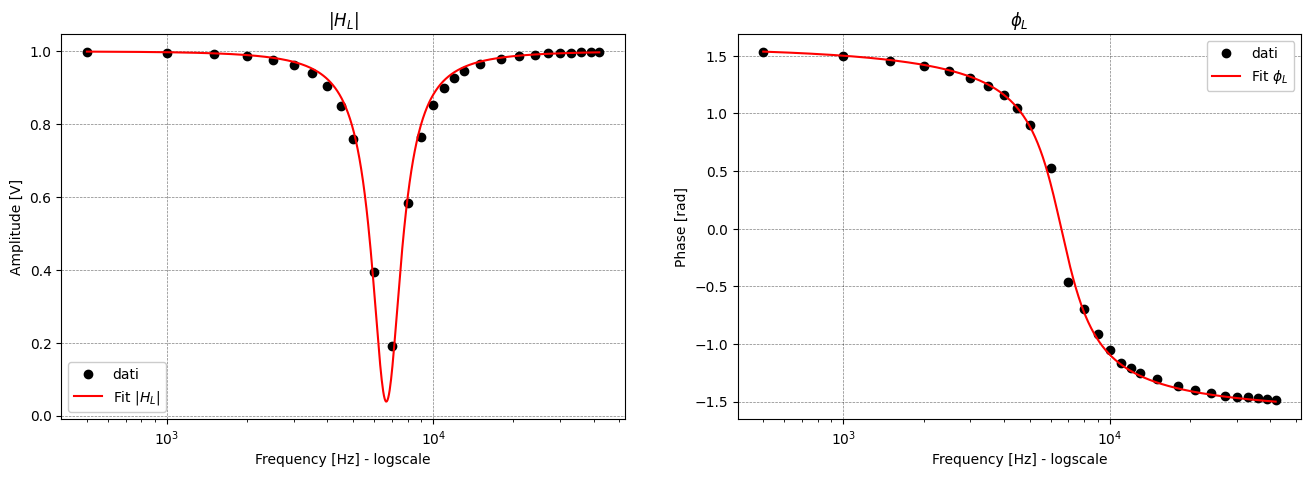

In [68]:
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, V_l, 'o', label='dati', c='k')
plt.plot(x, G(x*2*np.pi, **f_m.values.to_dict()), label='Fit $|H_L|$', c='r')
plt.title('$|H_L|$')
plt.legend()
plt.xlabel('Frequency [Hz] - logscale')
plt.ylabel('Amplitude [V]')
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs, fase_l_mod, 'o', label='dati', c='k')
plt.plot(x, fase_R(x*2*np.pi, **f_f.values.to_dict()), label='Fit $\phi_L$', c='r')
plt.title('$\phi_L$')
plt.legend()
plt.xlabel('Frequency [Hz] - logscale')
plt.ylabel('Phase [rad]')
plt.xscale('log')
